# Seaborn

Seaborn is a visualization library that sits on top of matplotlib, making it nicer to look at and adding some extra capabilities too.

Let's start by loading up a real dataset on 2019 model-year vehicles (FuelEfficiency.csv), and plotting a histogram just using matplotlib to see the distribution by number of gears.

<AxesSubplot:>

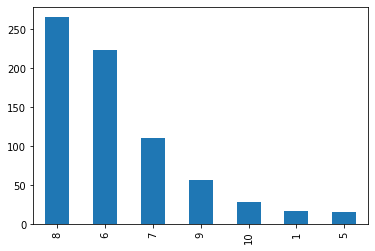

In [8]:
%matplotlib inline

import pandas as pd

df = pd.read_csv("FuelEfficiency.csv")

gear_counts = df['# Gears'].value_counts()

gear_counts.plot(kind='bar')

We can load up Seaborn, and just call set() on it to change matplotlib's default settings to something more visually pleasing.

In [9]:
import seaborn as sns
sns.set()

Now if we do the same plot command, it's a little more modern looking. Matplotlib is based on Matplot, and its visualization defaults are frankly showing their age.

<AxesSubplot:>

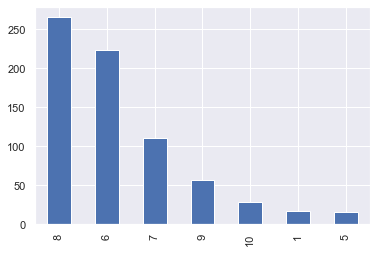

In [10]:
gear_counts.plot(kind='bar')

Let's take a closer look at the data we're dealing with.

In [11]:
df.head()

,Mfr Name,Carline,Eng Displ,Cylinders,Transmission,CityMPG,HwyMPG,CombMPG,# Gears
0,aston martin,Vantage V8,4.0,8,Auto(S8),18,25,21,8
1,Volkswagen Group of,Chiron,8.0,16,Auto(AM-S7),9,14,11,7
2,General Motors,CORVETTE,6.2,8,Auto(S8),12,20,15,8
3,General Motors,CORVETTE,6.2,8,Auto(S8),15,25,18,8
4,General Motors,CORVETTE,6.2,8,Auto(S8),14,23,17,8


Seaborn includes many types of plots that matplotlib doens't offer. For example, "distplot" can be used to plot a histogram together with a smooth distribution of that histogram overlaid on it. Let's plot the distribution of MPG values on the vehicles in this database as an example:

C:\Users\111042\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CombMPG', ylabel='Density'>

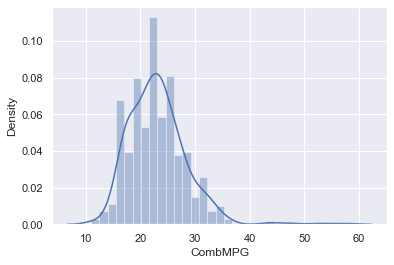

In [12]:
sns.distplot(df['CombMPG'])

Something you encounter pretty often is a "pair plot" from Seaborn. This lets you visualize plots of every combination of various attributes together, so you can look for interesting patterns between features.

As an example, let's classify cars by how many cylinders are in their engines, and look for relationships between cylinders, city MPG rating, Highway MPG rating, and combined MPG rating.

In [13]:
df2 = df[['Cylinders', 'CityMPG', 'HwyMPG', 'CombMPG']]
df2.head()

,Cylinders,CityMPG,HwyMPG,CombMPG
0,8,18,25,21
1,16,9,14,11
2,8,12,20,15
3,8,15,25,18
4,8,14,23,17


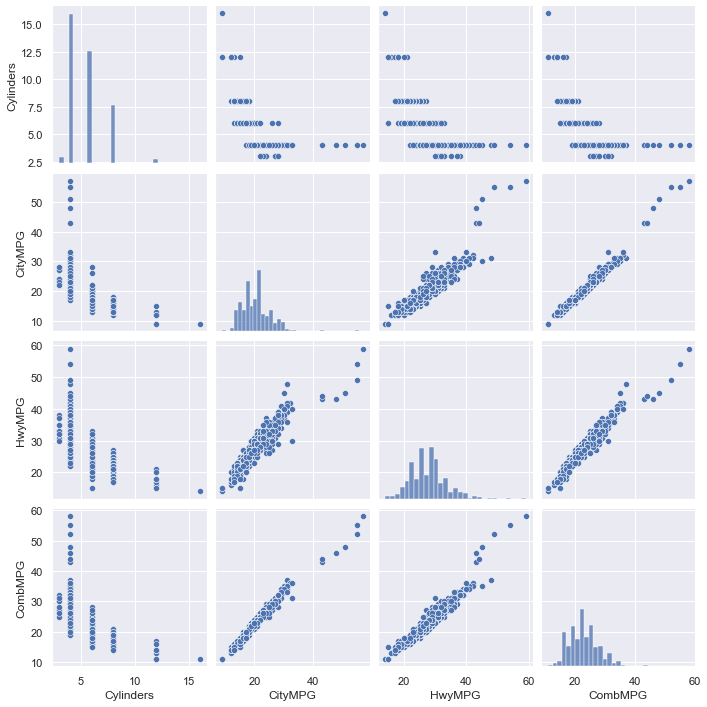

In [14]:
sns.pairplot(df2, height=2.5);  #Seaborn currently has a bug with the hue parameter so we've omitted it

By studying the results above, you can see there is a relationship between number of cylinders and MPG, but MPG for 4-cylinder vehicles ranges really widely. There also appears to be a good linear relationship between the different ways of measuring MPG values, until you get into the higher MPG ratings.

Seaborn 1.9 also includes "scatterplot", which is exactly what it sounds like. It plots individual data points across two axes of your choosing, so you can see how your data is distributed across those dimensions.

<AxesSubplot:xlabel='Eng Displ', ylabel='CombMPG'>

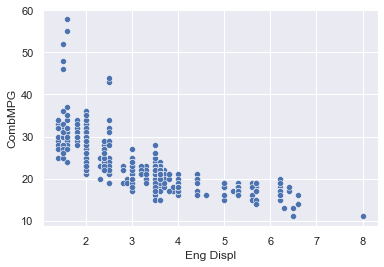

In [15]:
sns.scatterplot(x="Eng Displ", y="CombMPG", data=df)

Seaborn also offers a "jointplot", which combines a scatterplot with histograms on both axes. This lets you visualize both the individual data points and the distribution across both dimensions at the same time. 

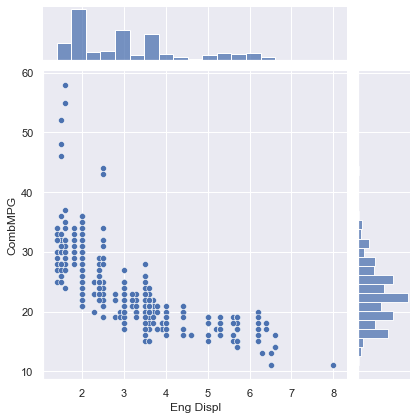

In [16]:
sns.jointplot(x="Eng Displ", y="CombMPG", data=df)

The "lmplot" is a scatterplot, but with a linear regression line computed and overlaid onto the data.

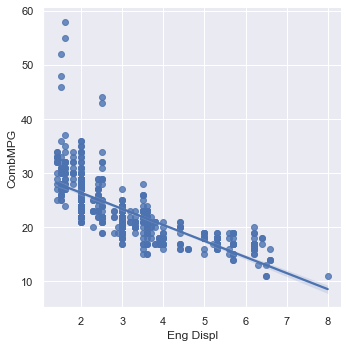

In [17]:
sns.lmplot(x="Eng Displ", y="CombMPG", data=df)

Next, let's look at a "box plot." This is what's called a "box and whiskers" plot, which is useful for visualizing typical values for a given category without getting distracted by outliers. Each box represents the range between the first and third quartiles of the data, with a line representing the median value. The "whiskers" that extend from the box represent the spread of the remainder of the data, apart from clear outliers that are plotted as individual points outside of the whiskers.

As an example, let's look at box plots for each vehicle manufacturer, visualizing the miles-per-gallon ratings across the vehicles they produce. This lets us look at the spread of MPG ratings across all the vehicles each manufacturer offers.

There are a lot of manufacturers, so to make the resulting graph readable we'll increase Seaborn's default figure size, and also use set_xticklabels to rotate the labels 45 degrees.

[Text(0, 0, 'aston martin'),
 Text(1, 0, 'Volkswagen Group of'),
 Text(2, 0, 'General Motors'),
 Text(3, 0, 'Ferrari'),
 Text(4, 0, 'FCA US LLC'),
 Text(5, 0, 'Jaguar Land Rover L'),
 Text(6, 0, 'MAZDA'),
 Text(7, 0, 'Nissan'),
 Text(8, 0, 'Porsche'),
 Text(9, 0, 'BMW'),
 Text(10, 0, 'Subaru'),
 Text(11, 0, 'Toyota'),
 Text(12, 0, 'Ford Motor Company'),
 Text(13, 0, 'Mercedes-Benz'),
 Text(14, 0, 'Honda'),
 Text(15, 0, 'Hyundai'),
 Text(16, 0, 'Rolls-Royce'),
 Text(17, 0, 'Volvo'),
 Text(18, 0, 'Kia'),
 Text(19, 0, 'Maserati'),
 Text(20, 0, 'Mitsubishi Motors Co')]

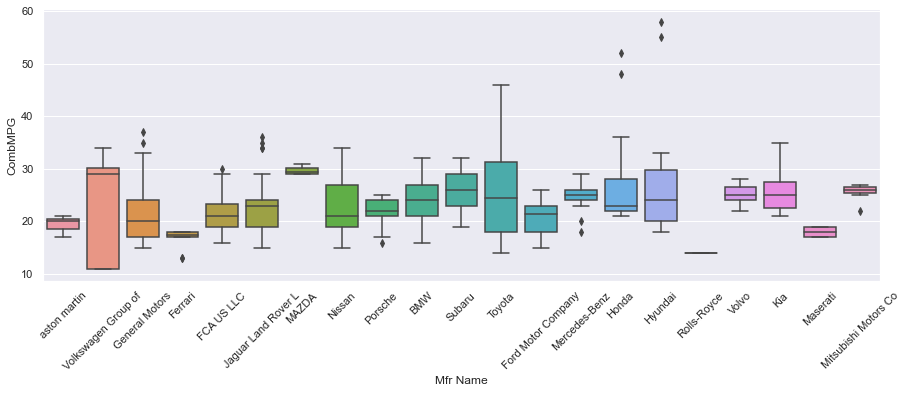

In [18]:
sns.set(rc={'figure.figsize':(15,5)})
ax=sns.boxplot(x='Mfr Name', y='CombMPG', data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

Another tool is the "count plot." This is basically the same thing as a histogram, but for categorical data. It lets you count up how many times each given category on the X axis occurs in your data, and plot it. So for example, we can see that General Motors offers more vehicle models than anyone else, with BMW not far behind.

[Text(0, 0, 'aston martin'),
 Text(1, 0, 'Volkswagen Group of'),
 Text(2, 0, 'General Motors'),
 Text(3, 0, 'Ferrari'),
 Text(4, 0, 'FCA US LLC'),
 Text(5, 0, 'Jaguar Land Rover L'),
 Text(6, 0, 'MAZDA'),
 Text(7, 0, 'Nissan'),
 Text(8, 0, 'Porsche'),
 Text(9, 0, 'BMW'),
 Text(10, 0, 'Subaru'),
 Text(11, 0, 'Toyota'),
 Text(12, 0, 'Ford Motor Company'),
 Text(13, 0, 'Mercedes-Benz'),
 Text(14, 0, 'Honda'),
 Text(15, 0, 'Hyundai'),
 Text(16, 0, 'Rolls-Royce'),
 Text(17, 0, 'Volvo'),
 Text(18, 0, 'Kia'),
 Text(19, 0, 'Maserati'),
 Text(20, 0, 'Mitsubishi Motors Co')]

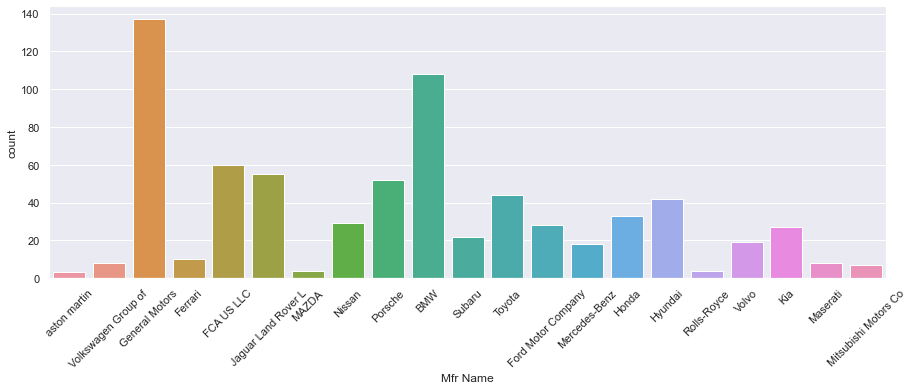

In [19]:
ax=sns.countplot(x='Mfr Name', data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

Finally, let's look at a heat-map in Seaborn. A heat map allows you to plot tabular, 2D data of some sort, with colors representing the individual values in each cell of the 2D table.

In this example, we'll create a pivot table from our original dataframe, to create a 2D table that contains the average MPG ratings for every combination of number of cylinders and engine displacement.

The resulting heatmap shows all of the engine displacement values along the X axis, and all of the cylinder values along the Y axis. For each cell of the table, the actual average MPG rating for that combination of cylinders and engine displacement is represented not as a number, but as a color that ranges from dark for small values, and light for larger values.

And, this does allow you visualize a clear trend where things get progressively darker as we move from the top-left of the graph to the bottom-right. Which makes sense; higher MPG ratings are associated with lower numbers of cylinders, and lower engine displacment values. By the time we get to an 8-liter 16-cylinder engine, the average MPG is at its worst of about 12, represented by the color black.

This particular graph has a lot of missing data, but the heatmap deals with that gracefully. A 3-cylinder 8-liter engine simply does not exist!

<AxesSubplot:xlabel='Eng Displ', ylabel='Cylinders'>

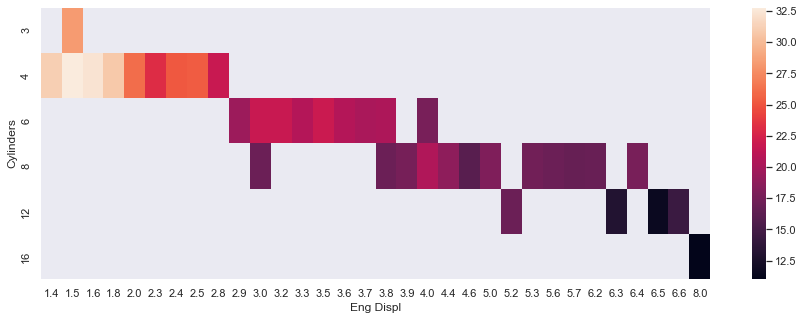

In [20]:
df2 = df.pivot_table(index='Cylinders', columns='Eng Displ', values='CombMPG', aggfunc='mean')
sns.heatmap(df2)

<AxesSubplot:>

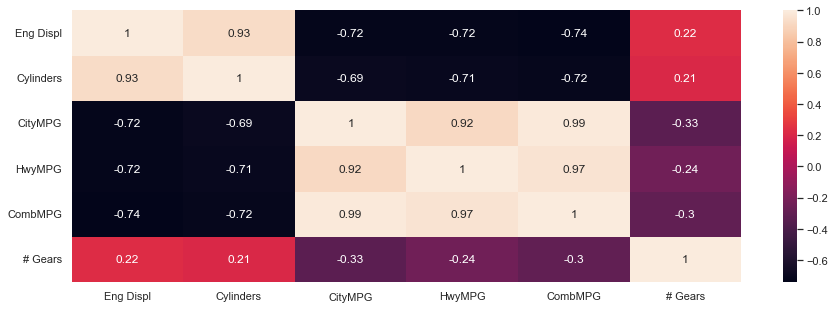

In [21]:
corr = df.corr()
sns.heatmap(corr,annot=True)

## Exercise

1. Load the dataset "pokemon.csv" into a Pandas dataframe df1
2. Plot a histogram of the speed column using distplot
3. Plot a scatter plot of the Attack and Defence columns
4. Plot a scatter plot with regression line of the Attack and Defence columns
5. Drop the ['Total','Legendary','Generation'] columns from the original dataframe and save it to a new dataframe df2
6. Plot a Boxplot and a heatmap of the new dataframe df2


In [22]:
%matplotlib inline

import pandas as pd

df1 = pd.read_csv("pokemon.csv")

df1.head(50)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


C:\Users\111042\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Speed', ylabel='Density'>

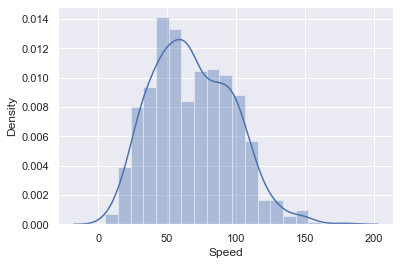

In [23]:
import seaborn as sns
sns.set_style()
sns.distplot(df1.Speed)


<AxesSubplot:xlabel='Attack', ylabel='Defense'>

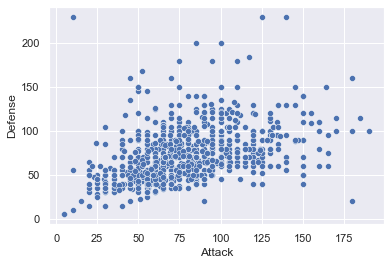

In [25]:
sns.scatterplot(x='Attack', y="Defense", data=df1)

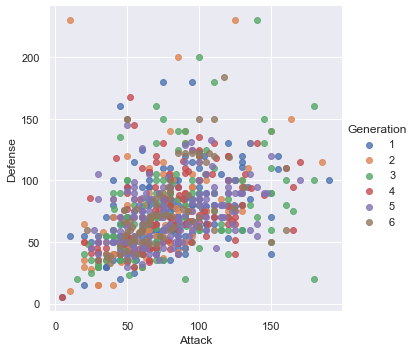

In [27]:
sns.lmplot(x='Attack', y="Defense",hue = 'Generation',fit_reg= False, data=df1)

<AxesSubplot:>

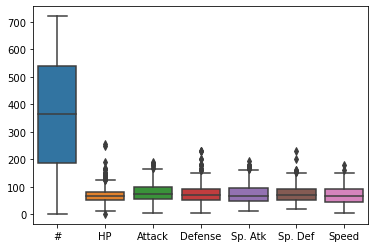

In [6]:
df2 = df1.drop(['Total','Legendary','Generation'],axis = 1)
sns.boxplot(data = df2)

<AxesSubplot:>

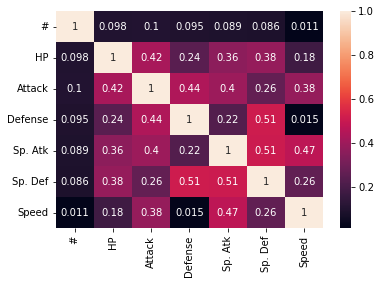

In [7]:
corr = df2.corr()
sns.heatmap(corr, annot=True)